<h1> Create Signal and BG PDF for profile likelihood. Using libNEST on LZGit </h1>

In [1]:
from __future__ import division
import sys
home_dir=!echo "$HOME"
sys.path.insert(2,home_dir[0]+'/iPyNb/NERSC_Import') 
from pyROOT_import import *
from pyNEST import *
from ROOT import TH2D
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"

Populating the interactive namespace from numpy and matplotlib


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).
`%matplotlib` prevents importing * from pylab and numpy


<h1> Setup </h1>

In [2]:
subdir='nominal' #folder to save the outputs and the pdfs generated here
g1=0.075 #nominal is 0.075

if not(os.path.isdir('root_pdfs/'+subdir)):
    os.mkdir('root_pdfs/'+subdir)

#options: ParticleType='NR',energy=10,f_drift=-1,xe_density=2.888,drift_time=-1,g1=0.075, nFold=3, eff_extract=0.95,e_lifetime=845, spEff_direct=0.9, Det='LZ'
NEST =NEST_setup(Det='LZ',g1=g1, custom=True)

S1_min=0
S1_max=50
S2_max=5e4
S2raw_min=450
#NS1_coin_req=3

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: LCE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: EField (Potential memory leak).


<h1> Code to check what 6.5 keVee and 30 keVnr correspond to for a given g1</h1>

In [3]:
#NEST=NEST_setup(g1=g1,custom=True)
NEST.SetParticleType(0)
#NR
NEST.SetEnergy(30)
ave_s1=[]
ave_s2=[]
for ii in range(1000):
    NEST.DetectorResponse()
    ave_s1.append(NEST.GetS1c())
    ave_s2.append(NEST.GetS2c())
print('NR (30 keV)', 'S1c=',mean(ave_s1), 'S2c=', mean(ave_s2))

#ER
NEST.SetParticleType(1)
NEST.SetEnergy(6.5)
ave_s1=[]
ave_s2=[]
for ii in range(1000):
    NEST.DetectorResponse()
    ave_s1.append(NEST.GetS1c())
    ave_s2.append(NEST.GetS2c())
print('ER (6.5 keV)', 'S1c=',mean(ave_s1), 'S2c=', mean(ave_s2))

('NR (30 keV)', 'S1c=', 20.866788715927282, 'S2c=', 11363.261696421454)
('ER (6.5 keV)', 'S1c=', 17.373547580930129, 'S2c=', 18529.05749862568)


<h1> ATM nu PDF </h1>

total between 1.00 and 100.00 keV = 1.09144e-07 [evts/kg/day]
Detector exposure factor = 1.6361e+06


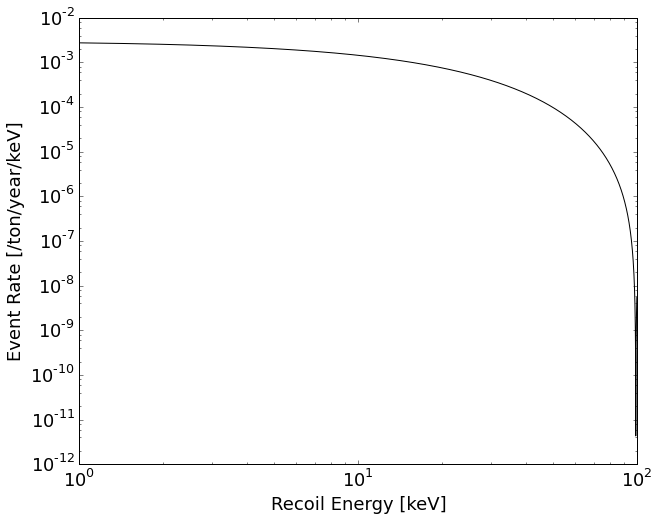

In [4]:
# ATM nu PDF

file_path='data/atm_Peter_update.txt' #caught a 2x error in rate
ParticleType=0 #'NR'
nSim=1e6

NEST.SetParticleType(ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

hatm=TH2D("hatm","atm pdf;S1;S2",100,S1_min,S1_max,100,0,S2_max) # make a histogram with 100 bins 0 to 100 in S1,and 100 bins 0 to 1e5 in S2
for index, S1_val in enumerate(S1_cut):
    hatm.Fill(S1_cut[index],S2_cut[index])
hatm.Scale(Rate_evts_kg_day/nSim)
hatm.SaveAs('root_pdfs/'+subdir+'/atm_pdf.root') #write out to file

In [5]:
hatm.Integral()

7.528738604696344e-08

<h1> B8 </h1>

total between 1.00 and 4.40 keV = 0.000260662 [evts/kg/day]
Detector exposure factor = 685.069


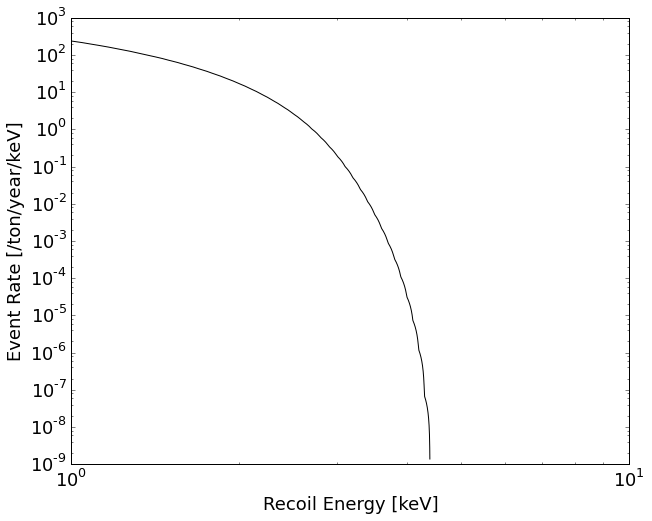

In [6]:
# 8B nu PDF

file_path='data/B8_Peter.txt'
ParticleType=0 #'NR'
nSim=1e6

NEST.SetParticleType(ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

hB8=TH2D("hB8","B8 pdf;S1;S2",100,S1_min,S1_max,100,0,S2_max) 
for index, S1_val in enumerate(S1_cut):
    hB8.Fill(S1_cut[index],S2_cut[index])
hB8.Scale(Rate_evts_kg_day/nSim)
hB8.SaveAs('root_pdfs/'+subdir+'/B8_pdf.root') #write out to file

<h1> HEP </h1>

total between 0.10 and 5.80 keV = 6.32879e-06 [evts/kg/day]
Detector exposure factor = 28215.7


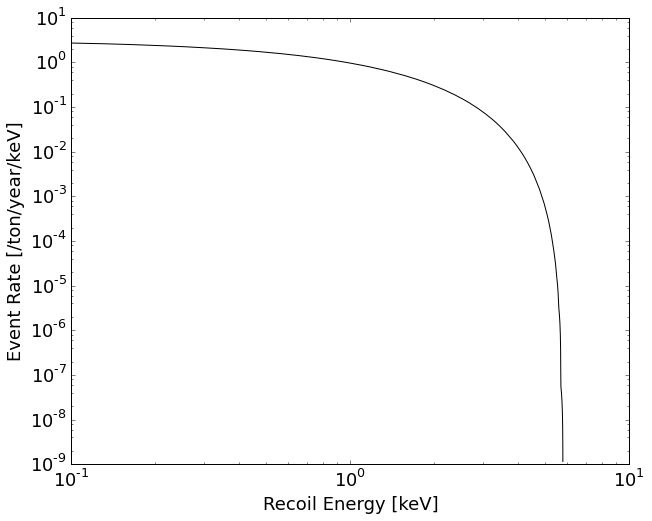

In [7]:
# 8B nu PDF

file_path='data/hep_Peter.txt' 
ParticleType=0 #'NR'
nSim=1e6

NEST.SetParticleType(ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

hhep=TH2D("hhep","hep pdf;S1;S2",100,S1_min,S1_max,100,0,S2_max) 
for index, S1_val in enumerate(S1_cut):
    hhep.Fill(S1_cut[index],S2_cut[index])
hhep.Scale(Rate_evts_kg_day/nSim)
hhep.SaveAs('root_pdfs/'+subdir+'/hep_pdf.root') #write out to file

<h1> DSN </h1>

total between 0.10 and 118.35 keV = 1.21975e-07 [evts/kg/day]
Detector exposure factor = 1.464e+06


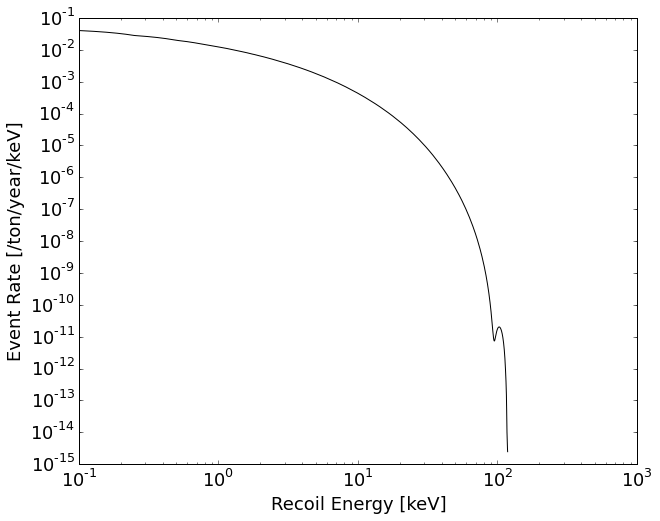

In [8]:
file_path='data/DSN_DiffRate.txt' 
ParticleType=0 #'NR'
nSim=1e6

NEST.SetParticleType(ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

hDSN=TH2D("hDSN","DNS pdf;S1;S2",100,S1_min,S1_max,100,0,S2_max) 
for index, S1_val in enumerate(S1_cut):
    hDSN.Fill(S1_cut[index],S2_cut[index])
hDSN.Scale(Rate_evts_kg_day/nSim)
hDSN.SaveAs('root_pdfs/'+subdir+'/DSN_pdf.root') #write out to file

<h1> PP + 7Be + 13N</h1>

total between 0.00 and 200.00 keV = 0.00110144 [evts/kg/day]
Detector exposure factor = 162.126


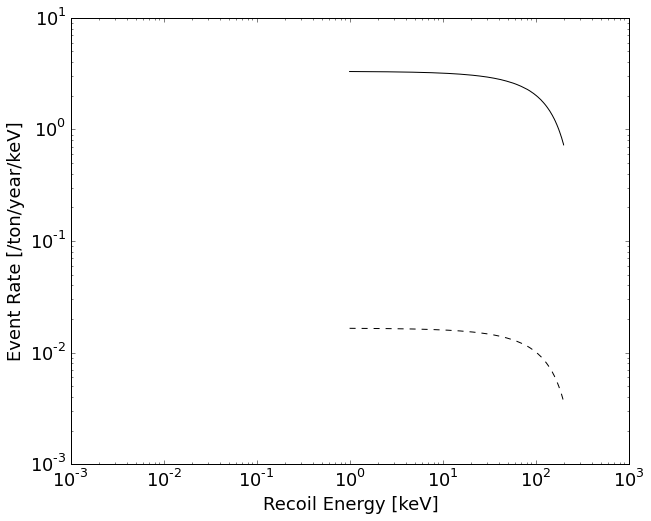

In [9]:
file_path='data/PPsolarNu_Peter.txt' 
ParticleType=1 #'ER'
nSim=1e6

NEST.SetParticleType(ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

hPP=TH2D("hPP","PP pdf;S1;S2",100,S1_min,S1_max,100,0,S2_max) 
for index, S1_val in enumerate(S1_cut):
    hPP.Fill(S1_cut[index],S2_cut[index])
hPP.Scale(Rate_evts_kg_day/nSim*250/271) #patch to match Peter's calculation
hPP.SaveAs('root_pdfs/'+subdir+'/PP_pdf.root') #write out to file

<h1>2nvBB 136Xe </h1>

total between 1.00 and 100.00 keV = 0.00188181 [evts/kg/day]
Detector exposure factor = 94.8936


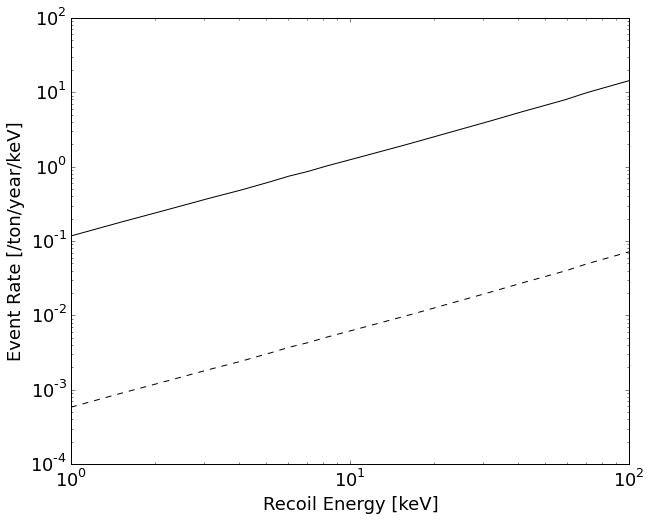

In [10]:
file_path='data/twovBB_evt_ton_year_keV_lin.txt' 
ParticleType=1 #'ER'
nSim=1e6

NEST.SetParticleType(ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

h2vBB=TH2D("h2vBB","2vBB pdf;S1;S2",100,S1_min,S1_max,100,0,S2_max) 
for index, S1_val in enumerate(S1_cut):
    h2vBB.Fill(S1_cut[index],S2_cut[index])
h2vBB.Scale(Rate_evts_kg_day/nSim) #patch to match Peter's calculation
h2vBB.SaveAs('root_pdfs/'+subdir+'/2vBB_pdf.root') #write out to file

<h1> 85Kr </h1>

total between 0.01 and 200.00 keV = 0.000124859 [evts/kg/day]
Detector exposure factor = 1430.18


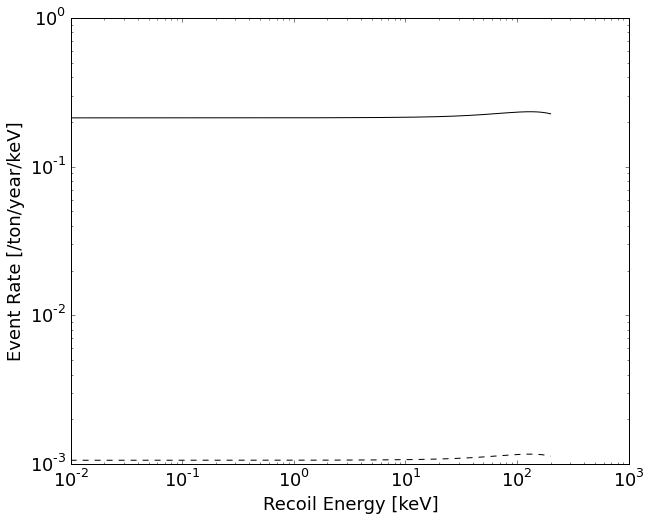

In [11]:
file_path='data/Kr85_beta_spectrum_LZ_fid.txt' 
ParticleType=1 #'ER'
nSim=1e6

NEST.SetParticleType(ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

hKr=TH2D("hKr","Kr pdf;S1;S2",100,S1_min,S1_max,100,0,S2_max) 
for index, S1_val in enumerate(S1_cut):
    hKr.Fill(S1_cut[index],S2_cut[index])
hKr.Scale(Rate_evts_kg_day/nSim) 
hKr.SaveAs('root_pdfs/'+subdir+'/Kr_pdf.root') #write out to file

<h1> Rn222 </h1>

total between 0.10 and 100.00 keV = 0.00278915 [evts/kg/day]
Detector exposure factor = 64.0236


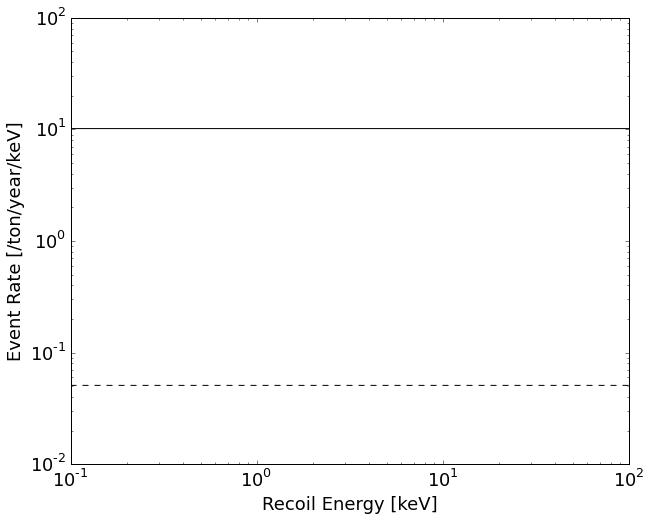

In [12]:
#scale factor c. LZ has 2 uBq/kg total and 3.57 in the fid
c=1*1.91*9.2/6.3 # LZ fiducial with 2 uBq/kg
Eee=np.linspace(0.1,100,2e3) # to 100 keV
Rn222 = c*3.65*ones(size(Eee))# (0.01 DRU per mBq/kg) #3.65 evts/keV/ton/year per 1 uBq/kg ... now LZ has 2 uBq/kg total
dR = Rn222 #evts/keV/ton/year


#### Rn222 ... approximate 0.3 evt/keV/Ton/year at 0.1 uBq/kg, LZ has about 0.7 uBq/kg ######## .... LZ now 2 uBq/kg
#Rn222_rate= c*20*0.35*100/365 #evt/Ton/year/keV...*100keV/365days to E_max with 0.7 uBq/kg
#nSim=ceil(Rn222_rate*1000*5.6)#in 1000 days *5.6 Tons #n in 1 LZ from 0-100 keV

np.savetxt('data/Rn222_LZ_fid.txt' ,np.vstack([Eee, dR]).T)

file_path='data/Rn222_LZ_fid.txt'
ParticleType=1 #'ER'
nSim=1e6

NEST.SetParticleType(ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

hRn=TH2D("hRn","Rn pdf;S1;S2",100,S1_min,S1_max,100,0,S2_max) 
for index, S1_val in enumerate(S1_cut):
    hRn.Fill(S1_cut[index],S2_cut[index])
hRn.Scale(Rate_evts_kg_day/nSim)
hRn.SaveAs('root_pdfs/'+subdir+'/Rn_pdf.root') #write out to file

<h1> Rn220 </h1>

total between 0.10 and 100.00 keV = 0.000457238 [evts/kg/day]
Detector exposure factor = 390.544


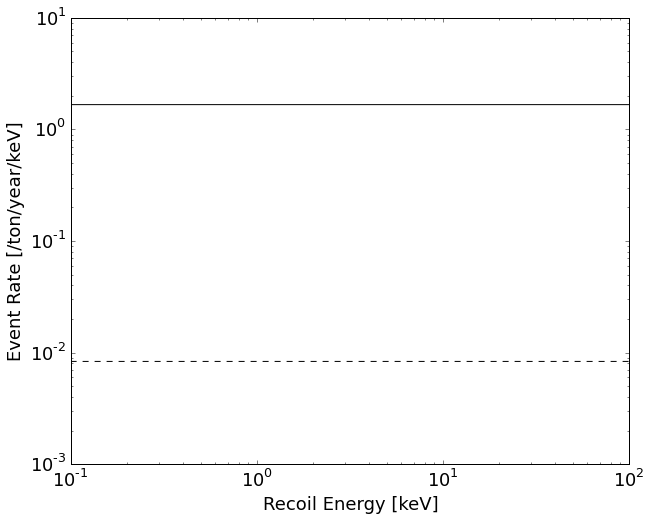

In [13]:
#scale factor c. LZ has 2 uBq/kg total and 3.57 in the fid
c=1*1.91*(9.2/6.3)*1/6.1 # LZ fiducial with 0.2 uBq/kg
Eee=np.linspace(0.1,100,2e3) # to 100 keV
Rn220 = c*3.65*ones(size(Eee))# (0.01 DRU per mBq/kg) #3.65 evts/keV/ton/year per 1 uBq/kg ... now LZ has 2 uBq/kg total
dR = Rn220 #evts/keV/ton/year


#### Rn222 ... approximate 0.3 evt/keV/Ton/year at 0.1 uBq/kg, LZ has about 0.7 uBq/kg ######## .... LZ now 2 uBq/kg
#Rn222_rate= c*20*0.35*100/365 #evt/Ton/year/keV...*100keV/365days to E_max with 0.7 uBq/kg
#nSim=ceil(Rn222_rate*1000*5.6)#in 1000 days *5.6 Tons #n in 1 LZ from 0-100 keV

np.savetxt('data/Rn220_LZ_fid.txt' ,np.vstack([Eee, dR]).T)

file_path='data/Rn220_LZ_fid.txt'
ParticleType=1 #'ER'
nSim=1e6

NEST.SetParticleType(ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

hRn220=TH2D("hRn220","Rn220 pdf;S1;S2",100,S1_min,S1_max,100,0,S2_max) 
for index, S1_val in enumerate(S1_cut):
    hRn220.Fill(S1_cut[index],S2_cut[index])
hRn220.Scale(Rate_evts_kg_day/nSim)
hRn220.SaveAs('root_pdfs/'+subdir+'/Rn220_pdf.root') #write out to file

<h1> Detector ER fiducial BG from Paolo </h1>

total between 1.00 and 200.00 keV = 9.53012e-05 [evts/kg/day]
Detector exposure factor = 1873.76


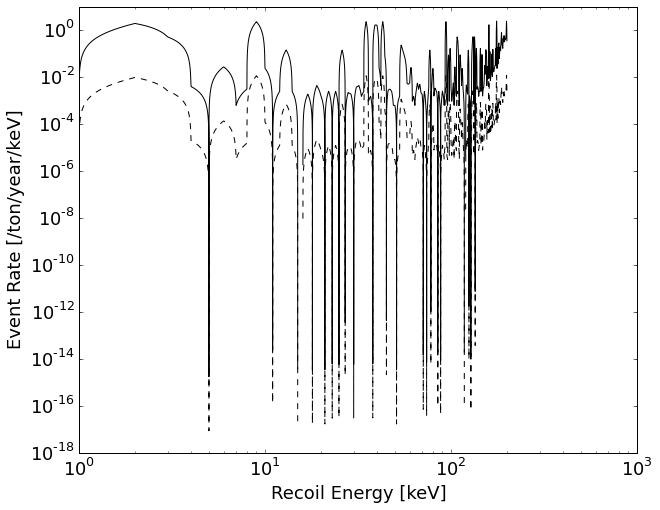

In [14]:
file_path='data/rate_er_fidvol.txt' 
ParticleType=1 #'ER'
nSim=1e6

NEST.SetParticleType(ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

hDetE=TH2D("hDetE","Det ER pdf;S1;S2",100,S1_min,S1_max,100,0,S2_max) 
for index, S1_val in enumerate(S1_cut):
    hDetE.Fill(S1_cut[index],S2_cut[index])
hDetE.Scale(Rate_evts_kg_day/nSim) 
hDetE.SaveAs('root_pdfs/'+subdir+'/Detfid_ER_pdf.root') #write out to file

<h1> Detector NR fiducial from Paolo </h1>

total between 1.00 and 199.00 keV = 1.40141e-07 [evts/kg/day]
Detector exposure factor = 1.27423e+06


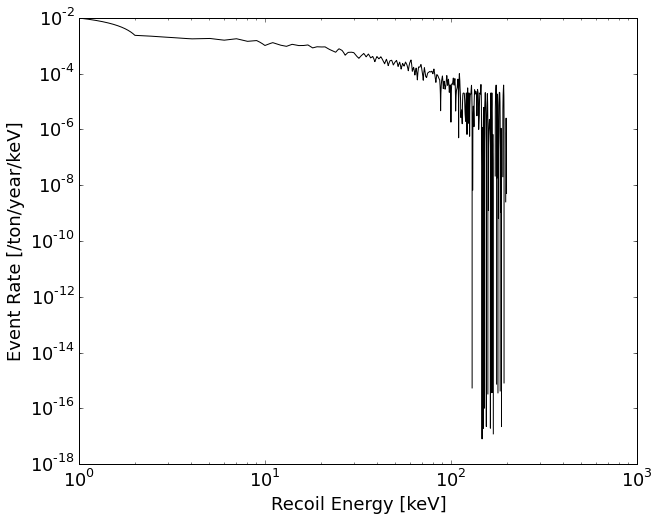

In [15]:
file_path='data/rate_nr_fidvol.txt' 
ParticleType=0 #'NR'
nSim=1e6

NEST.SetParticleType(ParticleType)
Nph, Ne, S1, S2, S1c, S2c, Rate_evts_kg_day, Det_exposure_factor = dN2S1S2(NEST=NEST, file_path=file_path, nSim=nSim)

WS_cut=(S1c>0) & (S2>=S2raw_min)
S1_cut=S1c[WS_cut]
S2_cut=S2c[WS_cut]

hDetN=TH2D("hDetN","Det NR pdf;S1;S2",100,S1_min,S1_max,100,0,S2_max) 
for index, S1_val in enumerate(S1_cut):
    hDetN.Fill(S1_cut[index],S2_cut[index])
hDetN.Scale(Rate_evts_kg_day/nSim*2) #2x correction adds another 0.33 Nu counts from Chams dust and Rn calculations 
hDetN.SaveAs('root_pdfs/'+subdir+'/Detfid_NR_pdf.root') #write out to file

<h1> Save and plot BG PDFs </h1>

In [16]:
# draw and make a pdf of pdf :p

c=rootnotes.default_canvas()
hatm.Draw("colz") # check it looks right
c.SaveAs('root_pdfs/'+subdir+'/atm_pdf.pdf')

c1=rootnotes.default_canvas()
hB8.Draw("colz") # check it looks right
c1.SaveAs('root_pdfs/'+subdir+'/b8_pdf.pdf')

c2=rootnotes.default_canvas()
hhep.Draw("colz") # check it looks right
c2.SaveAs('root_pdfs/'+subdir+'/hep_pdf.pdf')

c3=rootnotes.default_canvas()
hDSN.Draw("colz") # check it looks right
c3.SaveAs('root_pdfs/'+subdir+'/dsn_pdf.pdf')

c4=rootnotes.default_canvas()
hPP.Draw("colz") # check it looks right
c4.SaveAs('root_pdfs/'+subdir+'/pp_pdf.pdf')

c5=rootnotes.default_canvas()
h2vBB.Draw("colz") # check it looks right
c5.SaveAs('root_pdfs/'+subdir+'/2vBB_pdf.pdf')

c6=rootnotes.default_canvas()
hKr.Draw("colz") # check it looks right
c6.SaveAs('root_pdfs/'+subdir+'/Kr_pdf.pdf')

c7=rootnotes.default_canvas()
hRn.Draw("colz") # check it looks right
c7.SaveAs('root_pdfs/'+subdir+'/Rn_pdf.pdf')

c8=rootnotes.default_canvas()
hDetE.Draw("colz") # check it looks right
c8.SaveAs('root_pdfs/'+subdir+'/DetFid_E_pdf.pdf')

c9=rootnotes.default_canvas()
hDetN.Draw("colz") # check it looks right
c9.SaveAs('root_pdfs/'+subdir+'/DetFid_N_pdf.pdf')

c10=rootnotes.default_canvas()
hRn220.Draw("colz") # check it looks right
c10.SaveAs('root_pdfs/'+subdir+'/Rn220_pdf.pdf')



#create a root file with the four nu background PDFs

Fout=TFile('root_pdfs/'+subdir+'/All_BG.root','recreate')
Fout.Add(hB8)
Fout.Add(hhep)
Fout.Add(hDSN)
Fout.Add(hatm)
Fout.Add(hPP)
Fout.Add(h2vBB)
Fout.Add(hKr)
Fout.Add(hRn)
Fout.Add(hRn220)
Fout.Add(hDetE)
Fout.Add(hDetN)
Fout.Write()

100638

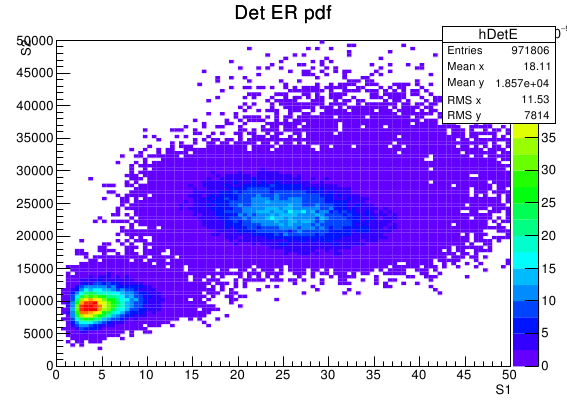

In [17]:
c5=rootnotes.default_canvas()
hDetE.Draw("colz") # check it looks right
#c5.SaveAs('root_pdfs/2vBB_pdf.pdf')
c5

<h1> Generate WIMP signal PDFs </h1>

total rate above 0.00 keV = 554435 [evts/kg/day per pb]
Detector exposure factor per pb = 3.22078e-07
total rate above 0.00 keV = 658201 [evts/kg/day per pb]
Detector exposure factor per pb = 2.71302e-07
total rate above 0.00 keV = 791070 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



Detector exposure factor per pb = 2.25734e-07
total rate above 0.00 keV = 926348 [evts/kg/day per pb]
Detector exposure factor per pb = 1.92769e-07
total rate above 0.00 keV = 1.0363e+06 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



Detector exposure factor per pb = 1.72316e-07
total rate above 0.00 keV = 1.1063e+06 [evts/kg/day per pb]
Detector exposure factor per pb = 1.61414e-07
total rate above 0.00 keV = 1.10278e+06 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



Detector exposure factor per pb = 1.61929e-07
total rate above 0.00 keV = 1.01276e+06 [evts/kg/day per pb]
Detector exposure factor per pb = 1.76322e-07
total rate above 0.00 keV = 872773 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



Detector exposure factor per pb = 2.04602e-07
total rate above 0.00 keV = 711022 [evts/kg/day per pb]
Detector exposure factor per pb = 2.51148e-07
total rate above 0.00 keV = 562256 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



Detector exposure factor per pb = 3.17598e-07
total rate above 0.00 keV = 431524 [evts/kg/day per pb]
Detector exposure factor per pb = 4.13816e-07
total rate above 0.00 keV = 327043 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



Detector exposure factor per pb = 5.46019e-07
total rate above 0.00 keV = 245659 [evts/kg/day per pb]
Detector exposure factor per pb = 7.26909e-07
total rate above 0.00 keV = 183396 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



Detector exposure factor per pb = 9.73692e-07
total rate above 0.00 keV = 136297 [evts/kg/day per pb]
Detector exposure factor per pb = 1.31017e-06
total rate above 0.00 keV = 100950 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



Detector exposure factor per pb = 1.76891e-06
total rate above 0.00 keV = 74678.3 [evts/kg/day per pb]
Detector exposure factor per pb = 2.39121e-06
total rate above 0.00 keV = 55185.1 [evts/kg/day per pb]

TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).



Detector exposure factor per pb = 3.23586e-06
total rate above 0.00 keV = 40738.5 [evts/kg/day per pb]
Detector exposure factor per pb = 4.38336e-06


TFile::Append:0: RuntimeWarning: Replacing existing TH1: wimpEventDensity (Potential memory leak).


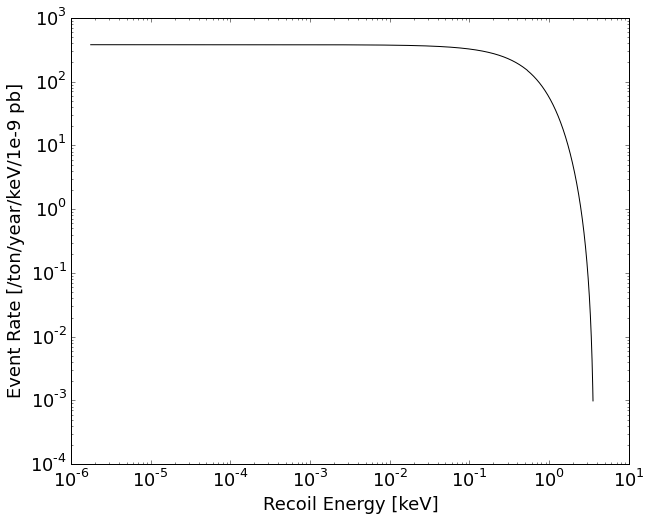

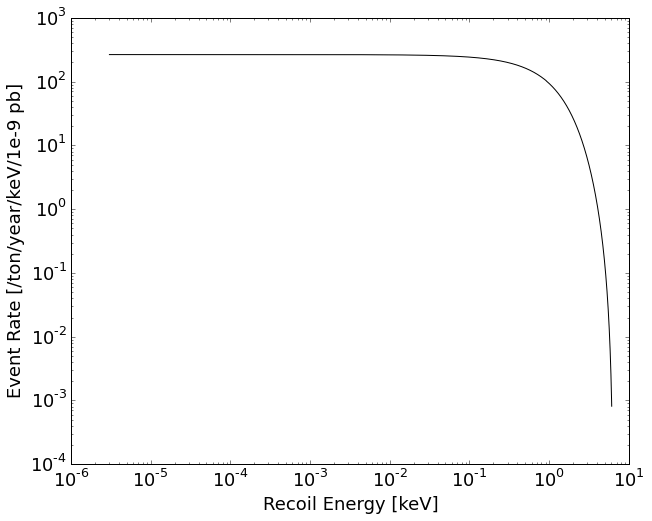

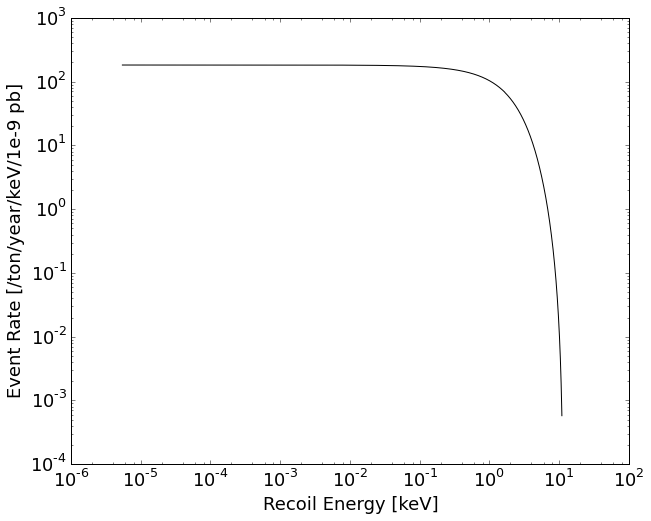

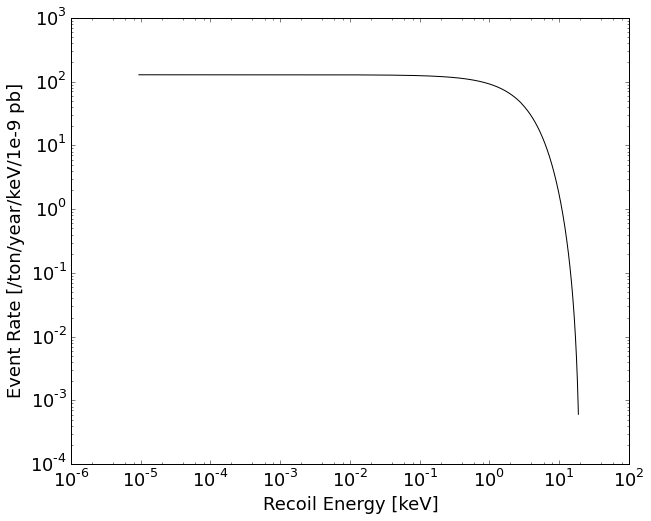

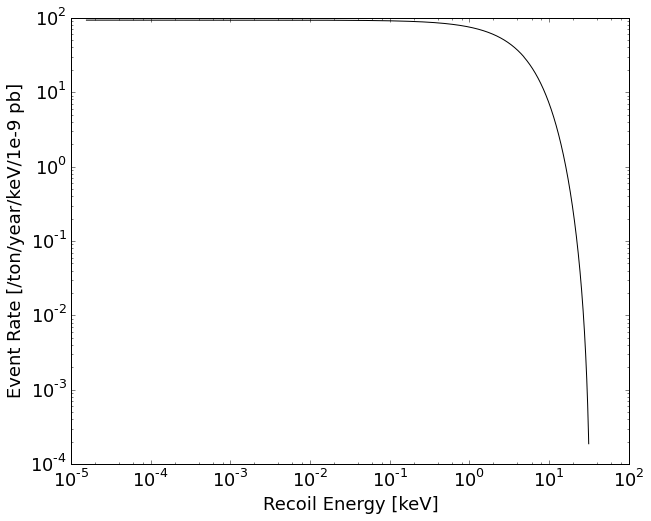

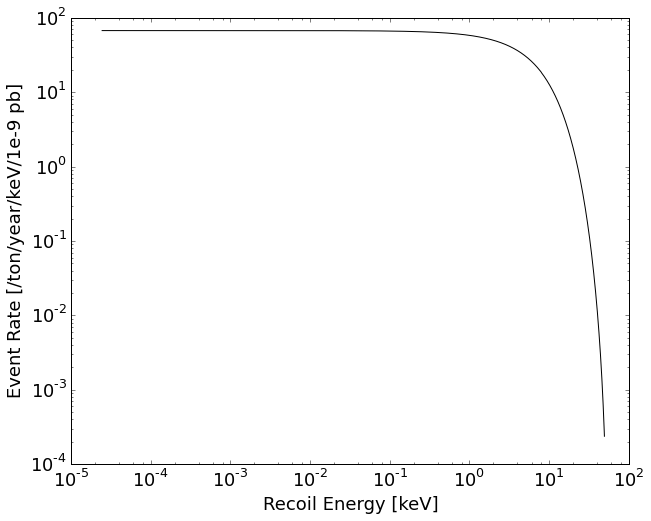

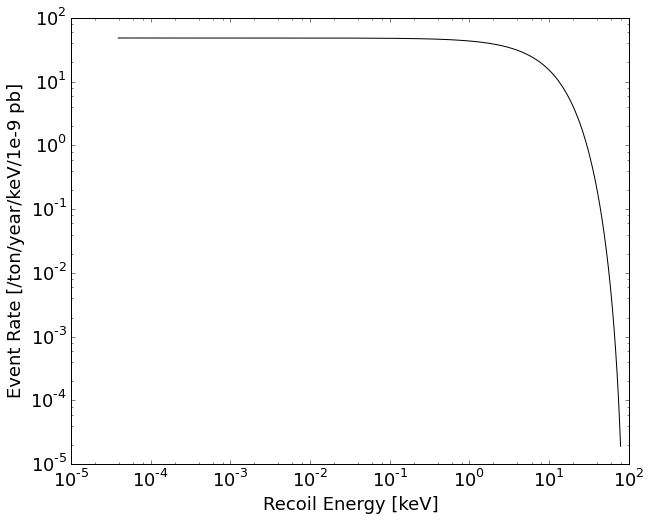

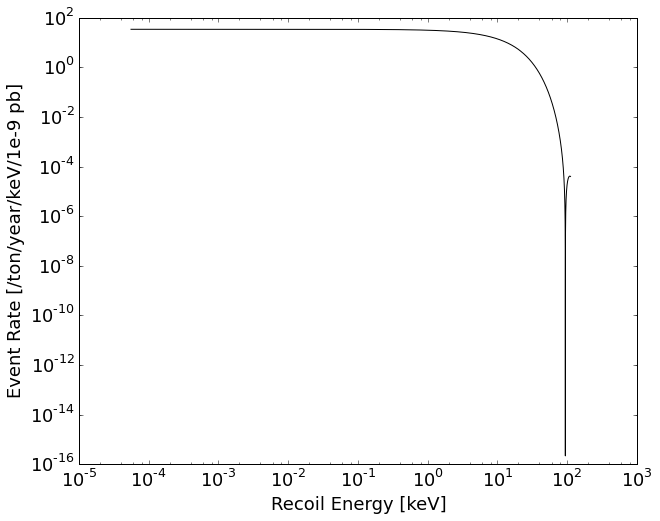

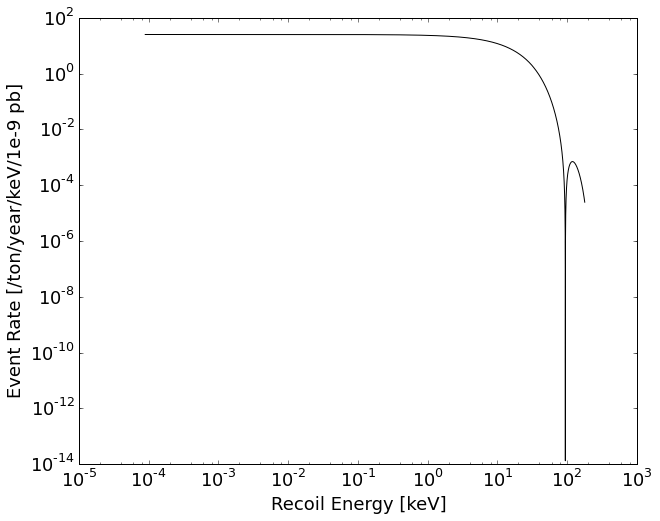

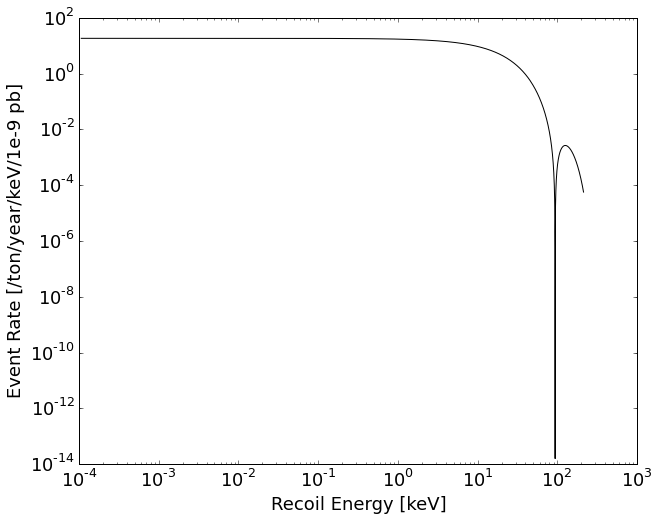

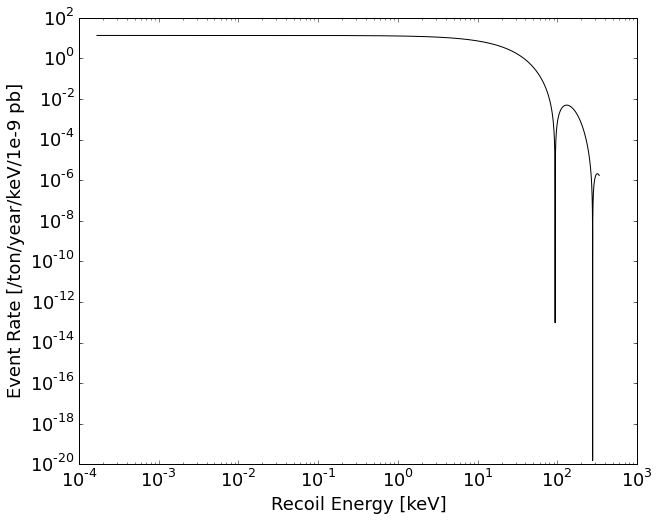

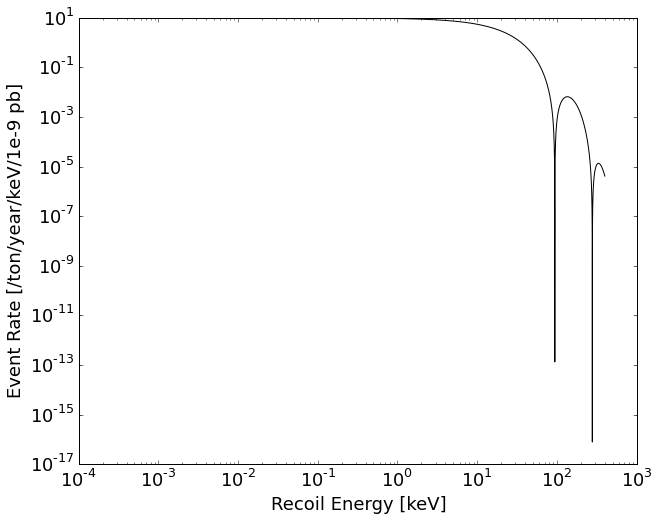

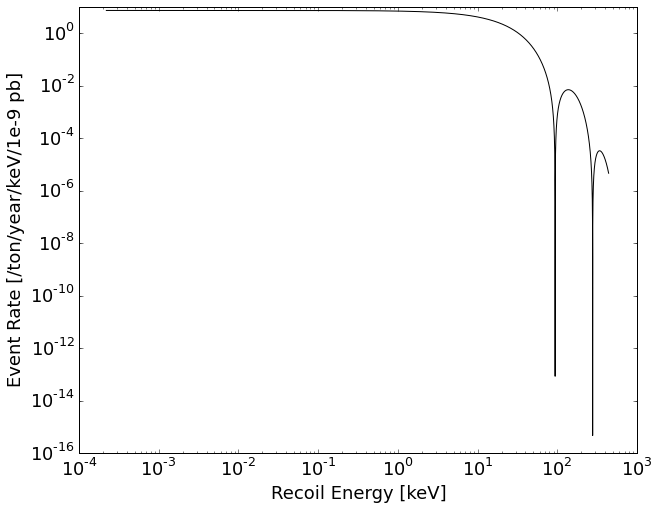

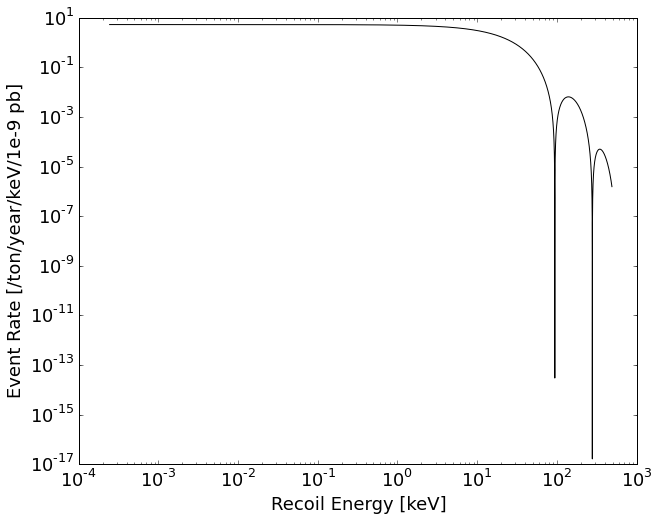

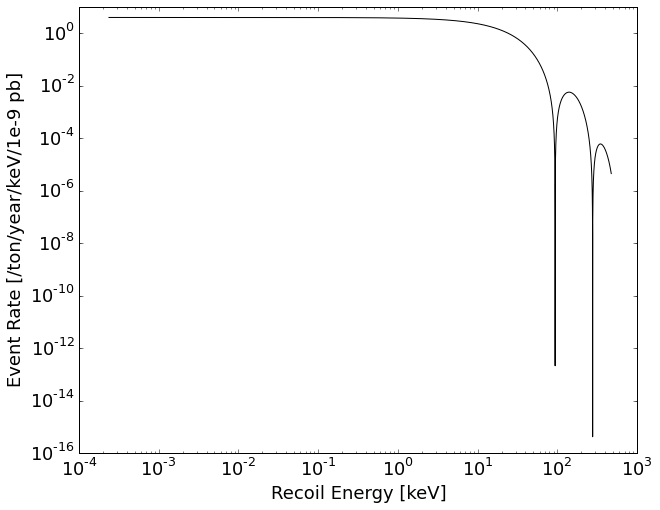

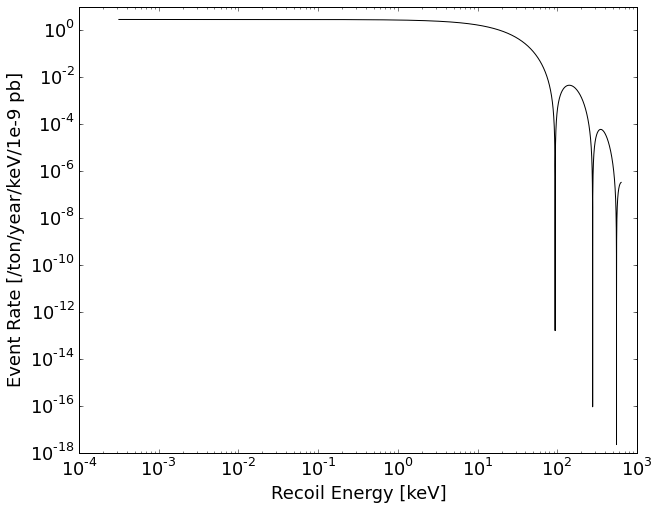

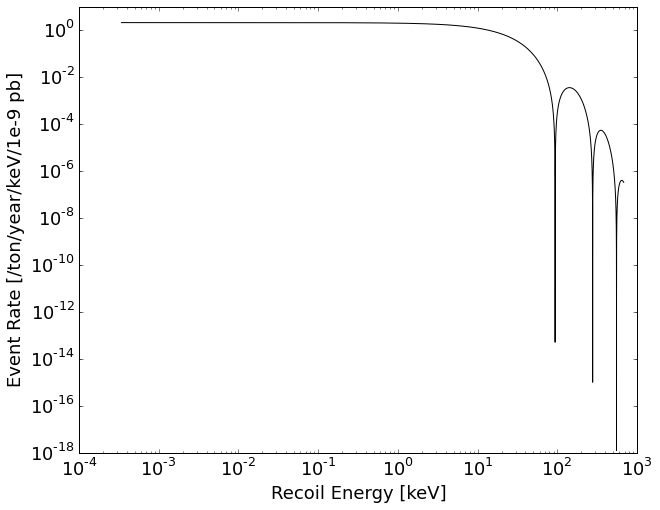

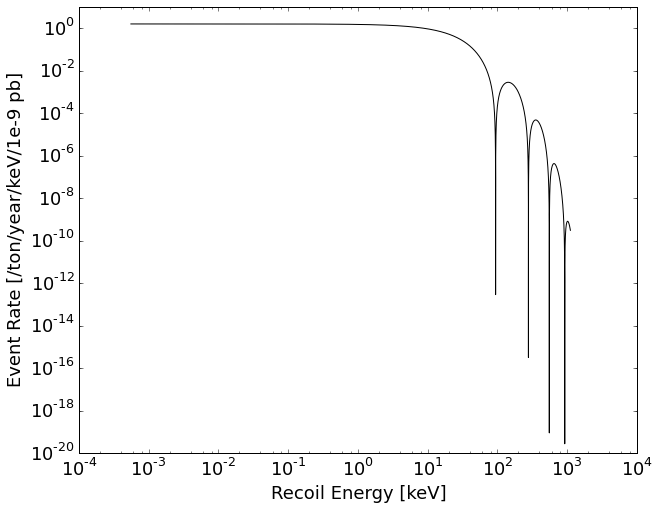

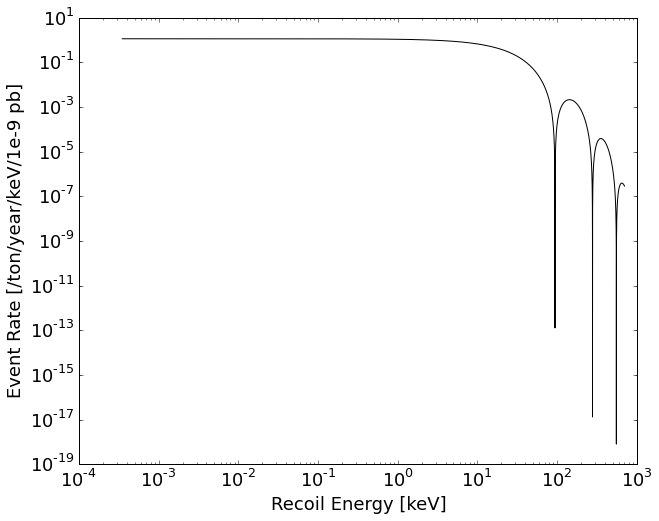

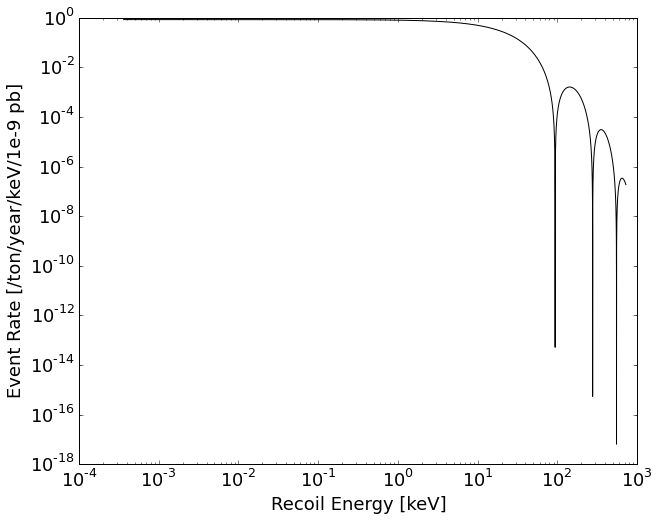

In [18]:
nSim=1e6
NEST.SetParticleType(0) #set NEST to NR for WIMPs

#Generate WIMPs
for mWmp in int32(logspace(log10(6),log10(2000),20)):
    Nph, Ne, S1, S2, S1c, S2c, WmpRate, Det_exposure_factor=WIMP2NphNe(NEST=NEST,mWmp=mWmp,nSim=nSim)
    # 1e-45 cm^2 cross section
    WS_cut=(S1c>0) & (S2>=S2raw_min)
    S1_cut=S1c[WS_cut]
    S2_cut=S2c[WS_cut]

    hWmp=TH2D("wimpEventDensity","WIMP pdf;S1;S2",100,S1_min,S1_max,100,0,S2_max)
    for index, S1_val in enumerate(S1_cut):
        hWmp.Fill(S1_cut[index],S2_cut[index])
    hWmp.Scale(WmpRate/nSim)
    #hWmp.Integral()
    hWmp.SaveAs('root_pdfs/'+subdir+'/mass_{:}_pdf.root'.format(mWmp)) #write out to file
    
    c=rootnotes.default_canvas()
    hWmp.Draw("colz") # check it looks right
    c.SaveAs('root_pdfs/'+subdir+'/mass_{:}_pdf.pdf'.format(mWmp)) #write out to file


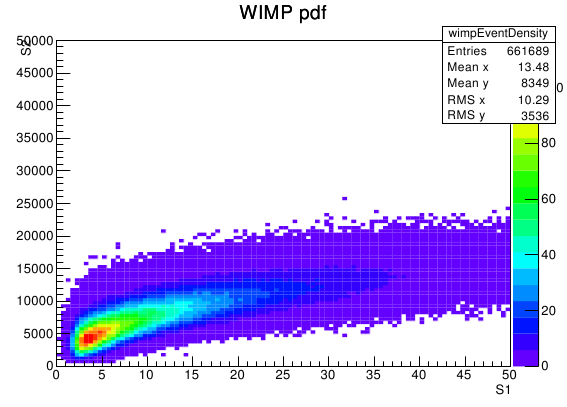

In [19]:
c4=rootnotes.default_canvas()
hWmp.Draw("colz") # check it looks right
c4

In [20]:
for index, ii in enumerate(int32(logspace(log10(6),log10(2000),20))):
    print(ii)

6
8
11
15
20
27
37
51
69
94
127
173
235
319
433
588
799
1085
1473
2000


In [21]:
int32(logspace(log10(6),log10(2000),20))

array([   6,    8,   11,   15,   20,   27,   37,   51,   69,   94,  127,
        173,  235,  319,  433,  588,  799, 1085, 1473, 2000], dtype=int32)